# *An Introduction To Machine Learning*

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Linear Classifier
In the field of machine learning, the goal of statistical classification is to use an object's characteristics to identify which class (or group) it belongs to.

A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics.

<img src='images/lecIII/linear_classifier.png'>

* $x$ is the feature vector
* $w$ is the parameter vector

<img src='images/lecIII/th_function.png'>

# Binary classifier
a binary classifier is only capable of distinguishing between just two classes.

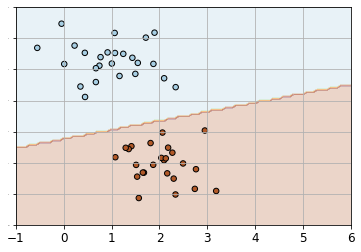

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 6, 100)
yy = np.linspace(-1, 6, 100)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
Z = Z>=0
plt.contourf(X1, X2, Z, alpha=0.25, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
            edgecolor='black', s=30)

plt.axis('tight')
plt.grid()
plt.show()

# MNIST
the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Cen‐ sus Bureau. Each image is labeled with the digit it represents.

## get the dataset

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [12]:
X = X.to_numpy()
y = y.to_numpy()

## lets take a quick look at the data

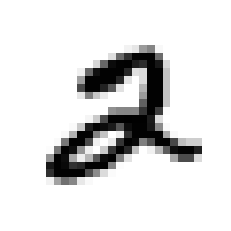

In [14]:
some_digit = X[5]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [15]:
y[5]

'2'

In [16]:
y = y.astype(np.uint8)

In [17]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [18]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

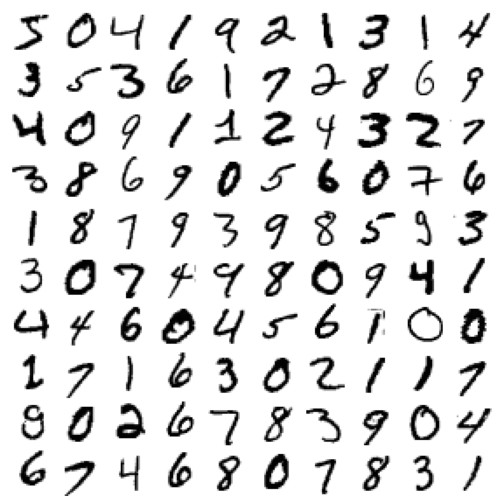

In [19]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
plt.show()

In [20]:
y[0]

5

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# what else could we do??

## binary classifier in MNIST
MNIST has 10 classes, we will choose 2 numbers for this part. eg, number 2 and number 9

In [26]:
mask_train = (y_train == 2) | (y_train == 9)
mask_test  = (y_test == 2)  | (y_test ==  9)

In [27]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train[mask_train], y_train[mask_train])

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict(X[5:6, :])

array([2], dtype=uint8)

# Performance Measures
There are many performance measures available...

## Measuring Accuracy Using Cross-Validation
K-fold cross-validation means splitting the training set into K-folds (in this case, three), then mak‐ ing predictions and evaluating them on each fold using a model trained on the remaining folds.

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train[mask_train], y_train[mask_train], cv=3, scoring="accuracy")

array([0.98463089, 0.98740237, 0.98765432])

## Confusion Matrix 

A much better way to evaluate the performance of a classifier is to look at the confusion matrix.

The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5 throw and 3 rdcolumn of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets.

In [32]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train[mask_train], y_train[mask_train], cv=3)

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train[mask_train], y_train_pred)

array([[5859,   99],
       [  61, 5888]], dtype=int64)

our goal is to predict every single instance correctly !!!!

In [34]:
y_train_perfect_predictions = y_train[mask_train]  # pretend we reached perfection
confusion_matrix(y_train[mask_train], y_train_perfect_predictions)

array([[5958,    0],
       [   0, 5949]], dtype=int64)

<img src=" 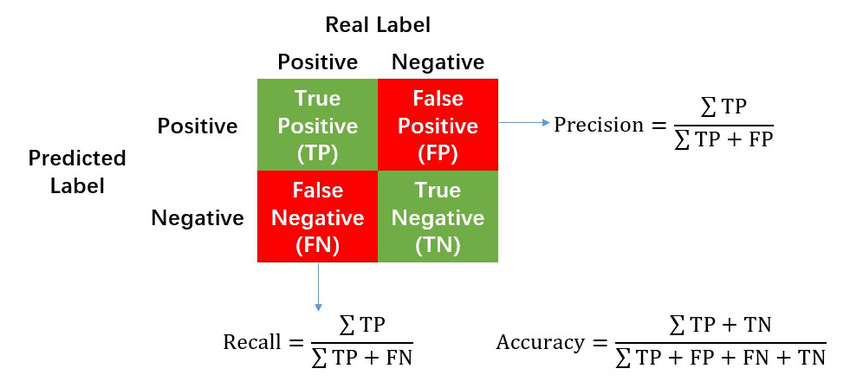">

In [38]:
from sklearn.metrics import precision_score, accuracy_score
print('accuracy =', accuracy_score(y_train[mask_train]==2, y_train_pred==2))
print('precision =', precision_score(y_train[mask_train]==2, y_train_pred==2))

accuracy = 0.9865625262450659
precision = 0.9896959459459459


In [ ]:
5859 / (5859 + 61)

0.9896959459459459

# Multiclass classification
Whereas binary classifiers distinguish between two classes, multiclass classifiers  (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.

However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

## one vs one
one strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on.

This is called the one-versus-one  (OvO) strategy.

## one vs all(rest)
another stratesy is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on).

Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.

This is called the one-versus-all  (OvA) strategy (also called one-versus-the-rest). 

In [39]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SGDClassifier())
ovr_clf.fit(X_train[0:1000], y_train[0:1000])
ovr_clf.predict([some_digit])

array([2], dtype=uint8)

In [40]:
len(ovr_clf.estimators_)

10

In [41]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier())
ovo_clf.fit(X_train[0:1000], y_train[0:1000])
ovo_clf.predict([some_digit])

array([2], dtype=uint8)

In [42]:
len(ovo_clf.estimators_)

45

now use sgd classifier for multiclass task ...

In [43]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([2], dtype=uint8)

In [44]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [45]:
y_train_pred = sgd_clf.predict(X_train)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5363,    0,   40,  131,    6,   98,   16,    7,  261,    1],
       [   1, 6482,   16,   74,    1,   10,    8,    8,  136,    6],
       [   5,   58, 4903,  292,   37,   30,   31,   48,  537,   17],
       [   3,    6,   65, 5637,    3,  120,    5,   19,  223,   50],
       [  14,   23,   32,   74, 4650,   50,   18,   40,  361,  580],
       [  17,    4,   31,  422,   32, 4318,   72,   31,  429,   65],
       [  15,    4,   61,   44,   25,   91, 5390,    3,  281,    4],
       [   3,    9,   49,  100,   22,   19,    2, 5671,  122,  268],
       [  13,   39,   28,  223,    6,  214,   13,   12, 5249,   54],
       [  10,    7,   20,  209,   46,   50,    0,  162,  262, 5183]],
      dtype=int64)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.8807666666666667

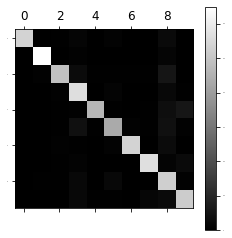

In [48]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

Test your model ...

In [ ]:
y_test_pred = sgd_clf.predict(X_test)
conf_mx = confusion_matrix(y_test, y_test_pred)
conf_mx

array([[ 902,    0,    8,   11,    1,   13,    2,    4,   39,    0],
       [   0, 1095,    2,    3,    0,    2,    4,    1,   28,    0],
       [   1,   10,  803,   69,    6,    4,    4,   10,  122,    3],
       [   0,    1,    6,  931,    1,   21,    3,    7,   35,    5],
       [   2,    2,    9,   15,  778,    4,    2,    9,   62,   99],
       [   6,    2,    1,   71,    3,  709,   12,   12,   67,    9],
       [   5,    3,   12,   13,    5,   21,  854,    0,   45,    0],
       [   0,    3,   18,   20,    3,    4,    1,  919,   18,   42],
       [   3,    5,    2,   30,    4,   43,    5,    5,  872,    5],
       [   3,    5,    2,   33,    7,    5,    0,   20,   57,  877]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.874

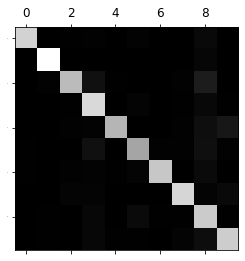

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()